<a href="https://colab.research.google.com/github/nubialmeida/projeto-pandas/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [ ]:
!pip install gcsfs

!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Declaração das LIBS

In [ ]:
import pandas as pd
import numpy as np
import os
from google.cloud import storage
import pandera as pa
import pymongo
from pymongo import MongoClient

##Conector para Cloud Storage(bucket)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto) conector

serviceAccount = '/content/drive/MyDrive/chave/colab.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('nubialmeida45')
bucket.blob('amsterdam_weekdays.csv')
path = 'gs://nubialmeida45/brutos/amsterdam_weekdays.csv'

##Extração dos dados(Extract)

In [ ]:
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')

##Conector MongoDB Atlas

In [ ]:
#Conectando MongoDB Atlas
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

db = client['Brutos']
colecao = db['Airbnb']

In [ ]:
#Selecionando a base e coleção
db = client['Projeto_AirBnb']
colecaoAirBnb = db['brutos']
colecaoAirBnb.count_documents({})

1103

In [ ]:
#Enviando de um dataframe para coleção no MONGO
df_dict = df.to_dict("records")

colecaoAirBnb.insert_many(df_dict)

##Pré Análise

In [ ]:
df 

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532


In [ ]:
df.dtypes #Verificando os tipos

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

Pré-análise

In [ ]:
df


,preco_total,tipo_quarto,compart_quarto,priv_quarto,capacidade_pessoa,super_anfitriao,multi_quarto,tipo_uso,nota_limpeza,nota_satisfacao,n_quartos,dist_cidade,dist_metro
0,194.033698,quarto_privado,False,True,2,False,1,0,10.0,93.0,1,5.022964,2.539380
1,344.245776,quarto_privado,False,True,4,False,0,0,8.0,85.0,1,0.488389,0.239404
2,264.101422,quarto_privado,False,True,2,False,0,1,9.0,87.0,1,5.748312,3.651621
3,433.529398,quarto_privado,False,True,4,False,0,1,9.0,90.0,2,0.384862,0.439876
4,485.552926,quarto_privado,False,True,2,True,0,0,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,apartamento,False,False,2,False,0,0,10.0,100.0,1,2.375833,1.436054
1099,233.637194,quarto_privado,False,True,2,False,1,0,10.0,90.0,1,4.719736,0.322263
1100,317.062311,quarto_privado,False,True,2,False,1,0,10.0,92.0,1,0.598355,0.751993
1101,1812.855904,apartamento,False,False,4,False,0,0,8.0,84.0,5,1.943020,0.388532


##Tranformações (Limpeza, conversão , etc)

In [ ]:
df = pd.read_csv(path) #Backup
dfback = df.copy()

In [ ]:
df.drop(['Unnamed: 0','attr_index','attr_index_norm','rest_index','rest_index_norm','rest_index','lng','lat'],axis=1,inplace=True) #Dropando pois não irá influenciar nessa análise

In [ ]:
#Renomeando colunas

df.rename(columns={'realSum': 'preco_total',
                   'room_type': 'tipo_quarto',
                   'room_shared': 'compart_quarto',
                   'room_private': 'priv_quarto',
                   'person_capacity' : 'capacidade_pessoa',
                   'host_is_superhost' : 'super_anfitriao',
                   'multi' : 'multi_quarto',
                   'biz' : 'tipo_uso',
                   'cleanliness_rating' : 'nota_limpeza',
                   'guest_satisfaction_overall' : 'nota_satisfacao',
                   'bedrooms' : 'n_quartos',
                   'dist' : 'dist_cidade',
                   'metro_dist' : 'dist_metro',
                   'lng': 'longitude',
                   'lat' : "latitude"
                   }, 
                   inplace = True)
                      

In [ ]:
 #Traduzindo linhas
 df.replace(['Private room','Entire home/apt','Shared room'],['quarto_privado','apartamento', 'compart_quarto'],inplace=True)

In [ ]:
sorted(pd.unique(df['tipo_quarto'])) #Verificando quais são os tipos de quartos únicos

['apartamento', 'compart_quarto', 'quarto_privado']

##Filtros

In [ ]:
#Tirando dado float
filtrofloat = df.capacidade_pessoa.astype('int') != df.capacidade_pessoa
df.loc[filtrofloat]
df.capacidade_pessoa = df.capacidade_pessoa.astype('int')

##GroupBY ( Agrupamentos)

In [ ]:
#Média do tipo de quarto com a nota de satisfacao
df.groupby(['tipo_quarto'])['nota_satisfacao'].mean()

tipo_quarto
apartamento       95.211896
compart_quarto    92.833333
quarto_privado    93.561717
Name: nota_satisfacao, dtype: float64

In [ ]:
#Média do tipo de quarto pela nota da limpeza
df.groupby(['tipo_quarto'])['nota_limpeza'].mean()

tipo_quarto
apartamento       9.438662
compart_quarto    9.166667
quarto_privado    9.486583
Name: nota_limpeza, dtype: float64

In [ ]:
#Média tipo de quarto pelo preço
df.groupby(['tipo_quarto'])['preco_total'].mean()

tipo_quarto
apartamento       733.179099
compart_quarto    280.973918
quarto_privado    366.764655
Name: preco_total, dtype: float64

##Plotagem

<Axes: xlabel='nota', ylabel='distância da cidade'>

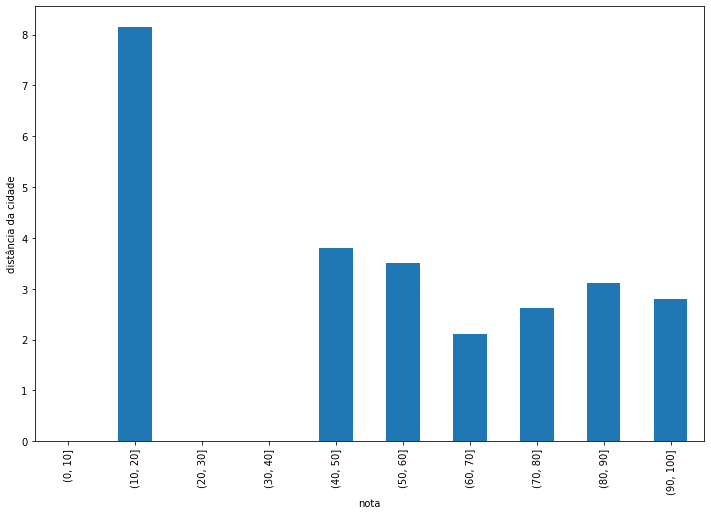

In [ ]:
faixas_de_nota = np.arange(0, 110, 10)
grupo_faixa_nota = pd.cut(df['nota_satisfacao'], faixas_de_nota)
df.groupby(grupo_faixa_nota)['dist_cidade'].mean().plot.bar(figsize=(12,8), xlabel='nota', ylabel='distância da cidade')#Verificando a nota de satisfação com relação à distância da cidade

<Axes: xlabel='nota', ylabel='distância do metrô'>

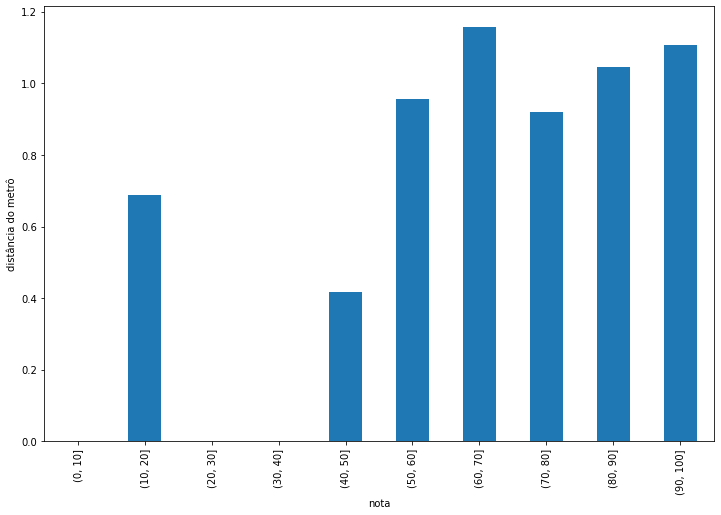

In [ ]:
faixas_de_nota = np.arange(0, 110, 10)
grupo_faixa_nota = pd.cut(df['nota_satisfacao'], faixas_de_nota)
df.groupby(grupo_faixa_nota)['dist_metro'].mean().plot.bar(figsize=(12,8), xlabel='nota', ylabel='distância do metrô') #Verificando o nota de satisfação com relação à distância do metrô

<Axes: xlabel='nota', ylabel='preço total'>

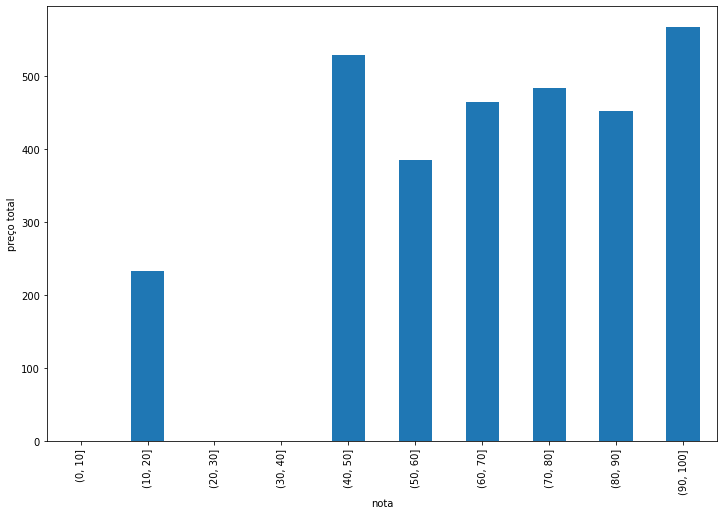

In [ ]:
faixas_de_nota = np.arange(0, 110, 10)
grupo_faixa_nota = pd.cut(df['nota_satisfacao'], faixas_de_nota)
df.groupby(grupo_faixa_nota)['preco_total'].mean().plot.bar(figsize=(12,8), xlabel='nota', ylabel='preço total') #Verificando a nota de satisfação em relação à distância da cidade

<Axes: xlabel='preço', ylabel='distância do metrô'>

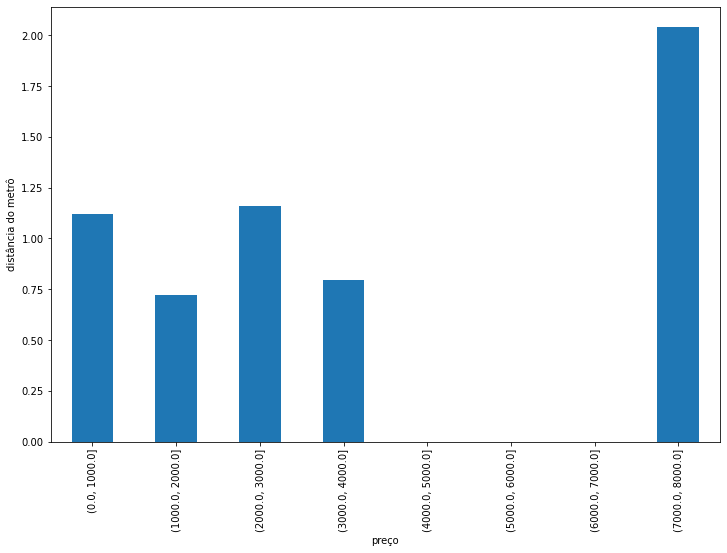

In [ ]:
faixas_de_preco = np.arange(0, df['preco_total'].max() + 1000, 1000)
grupo_faixa_preco = pd.cut(df['preco_total'], faixas_de_preco)
df.groupby(grupo_faixa_preco)['dist_metro'].mean().plot.bar(figsize=(12,8), xlabel='preço', ylabel='distância do metrô') #Verificando o preço total em relação à distância do metrô

<Axes: xlabel='preço', ylabel='distância da cidade'>

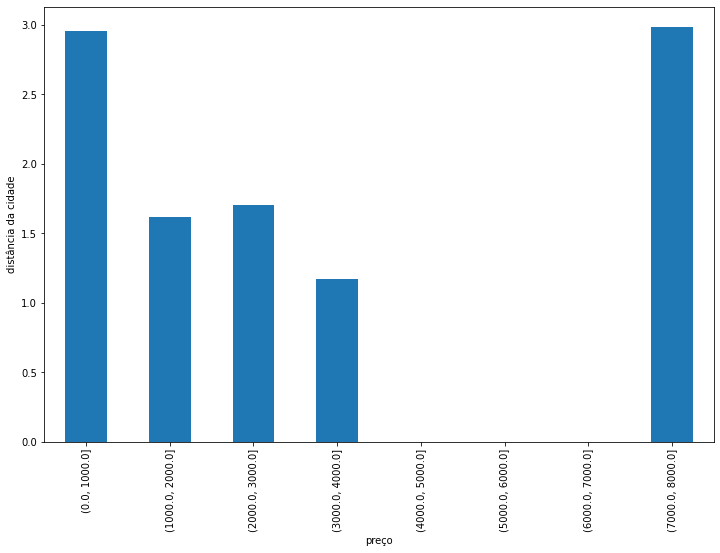

In [ ]:
faixas_de_preco = np.arange(0, df['preco_total'].max() + 1000, 1000)
grupo_faixa_preco = pd.cut(df['preco_total'], faixas_de_preco)
df.groupby(grupo_faixa_preco)['dist_cidade'].mean().plot.bar(figsize=(12,8), xlabel='preço', ylabel='distância da cidade') #Verificando o preço total com relação à distância da cidade

<Axes: ylabel='None'>

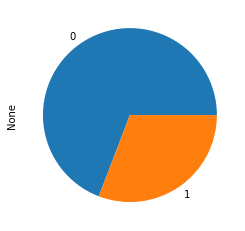

In [ ]:
df.groupby('multi_quarto',dropna=False).size().sort_values(ascending=False).plot.pie() #Verificando se tem vários quartos, 0 é false, 1 é true.

In [ ]:
df.groupby('tipo_quarto')['multi_quarto'].sum() #Verificando quais os tipos de quartos possuem multi quartos

tipo_quarto
apartamento       104
compart_quarto      3
quarto_privado    233
Name: multi_quarto, dtype: int64

<Axes: xlabel='Quartos', ylabel='Alugados'>

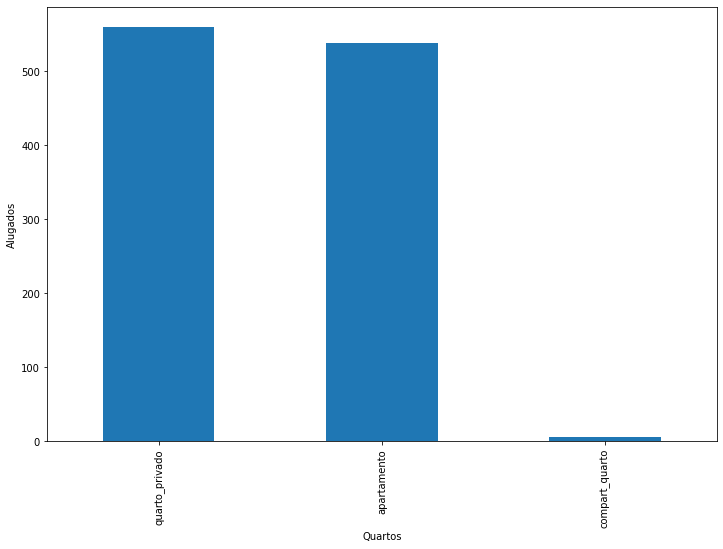

In [ ]:
df.groupby(['tipo_quarto'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Quartos',ylabel='Alugados') #Verificando os tipos de quartos

<Axes: ylabel='None'>

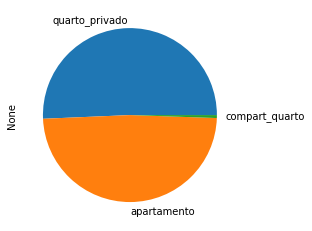

In [ ]:
df.groupby('tipo_quarto',dropna=False).size().sort_values(ascending=False).plot.pie() #Gráfico dos tipos de quartos

<Axes: ylabel='None'>

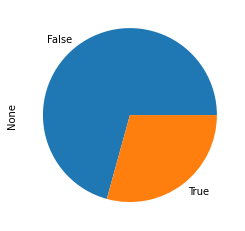

In [ ]:
df.groupby('super_anfitriao',dropna=False).size().sort_values(ascending=False).plot.pie() #Verificando se tem super anfitrião, onde false não tem e true tem.

In [ ]:
df.groupby('tipo_quarto')['super_anfitriao'].value_counts() #Verificando em quais tipos de quartos tem o super anfitrião

tipo_quarto     super_anfitriao
apartamento     False              424
                True               114
compart_quarto  False                4
                True                 2
quarto_privado  False              352
                True               207
Name: super_anfitriao, dtype: int64

In [ ]:
df.groupby(['tipo_quarto', 'super_anfitriao'])['nota_satisfacao'].mean() #Verificando a média da nota de satisfação que contém ou não o super anfitriao pelo tipo de quarto.

tipo_quarto     super_anfitriao
apartamento     False              94.563679
                True               97.622807
compart_quarto  False              90.750000
                True               97.000000
quarto_privado  False              91.562500
                True               96.961353
Name: nota_satisfacao, dtype: float64

##Criação do Schema de validação de dados

In [ ]:
schema = pa.DataFrameSchema(
    columns = {													
        'preco_total':pa.Column(pa.Int),
        'tipo_quarto':pa.Column(pa.String),
        'compart_quarto':pa.Column(pa.String),
        'priv_quarto':pa.Column(pa.String),
        'capacidade_pessoa':pa.Column(pa.Int),
        'super_anfitriao':pa.Column(pa.String),
        'multi_quarto':pa.Column(pa.Int),
        'tipo_uso':pa.Column(pa.Int),
        'nota_limpeza':pa.Column(pa.Int),
        'nota_satisfacao':pa.Column(pa.Int),
        'n_quartos':pa.Column(pa.Int),
        'dist_cidade':pa.Column(pa.Int),
        'dist_metro':pa.Column(pa.Int),
        'longitude':pa.Column(pa.Int),
        'latitude':pa.Column(pa.Int),
    }
)

##LOAD (Carregamento) salvar o df.


In [ ]:
#Para o bucket
df.to_csv('gs://nubialmeida45/tratados/amsterdam_weekdays.csv', index=False)

In [ ]:
#Conectando MongoDB Atlas
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

db = client['Tratados']
colecao = db['Airbnb']

In [ ]:
#Selecionando a base e coleção
db = client['Projeto_AirBnb']
colecaoAirBnb = db['tratado']
colecaoAirBnb.count_documents({})

1103

In [ ]:
#Enviando de um dataframe para coleção no MONGO
df_dict = df.to_dict("records")

colecaoAirBnb.insert_many(df_dict)

##CONSIDERAÇÕES FINAIS


### Através da análise dos dados desse dataframe, percebi que:
- A nota de satisfação e o preço não estão diretamente relacionados visto que alguns quartos com preços similares possuem notas muito diferentes;
- Alguns apartamentos com distâncias maiores do metrô receberam notas maiores, uma explicação para isso, seria que com uma distância do metrô teria menos barulho
- A maioria prefere ficar um pouco mais perto da cidade, isso se explica pela facilidade de locomoção
- Os quartos que lideram em locação são os privados, sendo eles os que tem maiores notas de limpeza e os menores preços
- Em segundo lugar, temos os apartamentos que apesar de terem as notas de limpeza bem próximas dos quartos privados, seus preços são os mais altos. A popularidade desse é explicada por possuirem condições parecidas com os quartos privados, a distância média da cidade e metrô são próximas e a diferença do preço se dá pelo o imóvel ser maior
- Apesar da maioria dos imóveis não terem super anfitrião, os que contém, possui a nota em torno de 5% maior, podendo ser explicado que haverá uma pessoa que irá organizar os problemas que haverão nos imóveis